In [1]:
import pandas as pd
import seaborn as sns
import numpy as np

In [2]:
df = pd.read_excel('База для ЛЭТИ.xlsx')

# Обработка

In [3]:
# Отредактировать столбец роста
for i, growth in enumerate(df['Рост, м']):
    try:
        growth = float(growth)
        if growth < 10:
            growth *= 100
        df.loc[i, 'Рост, м'] = growth
    except Exception as e:
        pass

In [4]:
df.head(5)

,N,Дата операции,"Тип операции (1 - ПРЖ, 2 - ГШ, 3 - ВЖБ, 4 - MGB-OAGB)",Возраст на момент операции,Возраст на момент повторного приема,Препараты,Заболевания,"НМЦ до 0 - нет, 1 - есть, 4 - менопауза, 5 - коки (без деления по структуре)","НМЦ после 0 - нет, 1 - есть, 4 - менопауза, 5 - коки (без деления по структуре)","НМЦ ДО 0 - норма, 1 - аменорея, 2 - олигоменорея, 3 - амк, 4 - менопауза, 5 - коки",...,Unnamed: 384,"FSFI: Удовлетворение (из 6,0)",Unnamed: 386,Unnamed: 387,"FSFI: Боль (из 6,0) (6,0 - никогда)",Unnamed: 389,Unnamed: 390,"FSFI: сумма (из 36,0)",Unnamed: 392,Unnamed: 393
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,>12,До БО,Через 1-12 мес,>12,До БО,Через 1-12 мес,>12,До БО,Через 1-12 мес,>12
1,NaN,2016-03-28 00:00:00,2,37.0,45.0,NaN,NaN,0.0,NaN,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,2016-12-05 00:00:00,1,24.0,31.0,NaN,Синдром Прадера-Вилли,1.0,NaN,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,2016-03-29 00:00:00,2,43.0,51.0,NaN,"гб, аит, камни желчного пузыря",NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,2017-09-07 00:00:00,1,38.0,44.0,NaN,"Повторный набор веса! Миома матки (АМК), гипер...",0.0,1.0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
df.iloc[0, 136] = 'Через 1-12 мес'

/tmp/ipykernel_19978/1724707377.py:1: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value 'Через 1-12 мес' has dtype incompatible with datetime64[ns], please explicitly cast to a compatible dtype first.
  df.iloc[0, 136] = 'Через 1-12 мес'


### Заменим NaN на пропуски и описание времени добавим в название столбца

In [6]:
for i in range(len(df.columns)):
    if type(df.iloc[0, i]) != str:
        df.iloc[0, i] = ''

/tmp/ipykernel_19978/2331151346.py:3: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  df.iloc[0, i] = ''


In [7]:
for i, column in enumerate(df.columns):
    if 'Unnamed' in column:
        df = df.rename(columns={column: last_column + ' ' + df.iloc[0, i]})
    else:
        last_column = column
        df = df.rename(columns={column: last_column + ' ' + df.iloc[0, i]})

In [8]:
df.head(5)

,N,Дата операции,"Тип операции (1 - ПРЖ, 2 - ГШ, 3 - ВЖБ, 4 - MGB-OAGB)",Возраст на момент операции,Возраст на момент повторного приема,Препараты,Заболевания,"НМЦ до 0 - нет, 1 - есть, 4 - менопауза, 5 - коки (без деления по структуре)","НМЦ после 0 - нет, 1 - есть, 4 - менопауза, 5 - коки (без деления по структуре)","НМЦ ДО 0 - норма, 1 - аменорея, 2 - олигоменорея, 3 - амк, 4 - менопауза, 5 - коки",...,"FSFI: Оргазм (из 6,0) >12","FSFI: Удовлетворение (из 6,0) До БО","FSFI: Удовлетворение (из 6,0) Через 1-12 мес","FSFI: Удовлетворение (из 6,0) >12","FSFI: Боль (из 6,0) (6,0 - никогда) До БО","FSFI: Боль (из 6,0) (6,0 - никогда) Через 1-12 мес","FSFI: Боль (из 6,0) (6,0 - никогда) >12","FSFI: сумма (из 36,0) До БО","FSFI: сумма (из 36,0) Через 1-12 мес","FSFI: сумма (из 36,0) >12"
0,,,,,,,,,,,...,>12,До БО,Через 1-12 мес,>12,До БО,Через 1-12 мес,>12,До БО,Через 1-12 мес,>12
1,NaN,2016-03-28 00:00:00,2,37.0,45.0,NaN,NaN,0.0,NaN,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,2016-12-05 00:00:00,1,24.0,31.0,NaN,Синдром Прадера-Вилли,1.0,NaN,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,2016-03-29 00:00:00,2,43.0,51.0,NaN,"гб, аит, камни желчного пузыря",NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,2017-09-07 00:00:00,1,38.0,44.0,NaN,"Повторный набор веса! Миома матки (АМК), гипер...",0.0,1.0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
# Удалим нулевую строку
df = df[1:]

In [10]:
df.index = [i for i in range(len(df))]

# Нарушения менструального цикла

### Посмотрим в каких строках непустые ячейки у столбцов НМЦ

In [11]:
df.iloc[:, 8]

0           NaN
1           NaN
2           NaN
3           1.0
4           NaN
         ...   
165    0.023529
166    0.023529
167         NaN
168         NaN
169         NaN
Name: НМЦ после 0 - нет, 1 - есть, 4 - менопауза, 5 - коки (без деления по структуре) , Length: 170, dtype: object

In [12]:
not_empty_rows = []
for i, elem in enumerate(df.iloc[0:149, 8]):
    if not np.isnan(elem):
        not_empty_rows.append(i)

In [13]:
len(not_empty_rows)

73

### Достанем все столбцы, в строках not_empty_rows которых больше 50% непустых значений

In [14]:
not_empty_columns = []
for column in df.columns:
    try:
        count = 0
        for elem in df[column][not_empty_rows]:
            if np.isnan(elem) == False:
                count += 1
        
        if count/len(not_empty_rows) > 0.5:
            not_empty_columns.append(column)
    except:
        pass

In [15]:
len(not_empty_columns)

36

In [16]:
df_nmc = df.loc[0:149:, not_empty_columns]
df_nmc = df_nmc.iloc[not_empty_rows]

### Удалим лишние столбцы

In [17]:
for i, column in enumerate(df_nmc.columns):
    print(i, column)

0 Тип операции (1 - ПРЖ, 2 - ГШ, 3 - ВЖБ, 4 - MGB-OAGB) 
1 Возраст на момент операции 
2 НМЦ до 0 - нет, 1 - есть, 4 - менопауза, 5 - коки (без деления по структуре) 
3 НМЦ после 0 - нет, 1 - есть, 4 - менопауза, 5 - коки (без деления по структуре) 
4 НМЦ ДО  0 - норма, 1 - аменорея, 2 - олигоменорея, 3 - амк, 4 - менопауза, 5 - коки 
5 НМЦ ПОСЛЕ 0 - норма, 1 - аменорея, 2 - олигоменорея, 3 - амк, 4 - менопауза, 5 - КОКи 
6 Беременности 
7 Количество беременностей, закончившихся родами до БО 
8 Прерывание беременности по тем или иным причинам 
9 Курение 0 - нет, 1 - да 
10 Наследственность по ранней менопаузе (до 45 лет) 0 - нет, 1 - да 
11 Сколько раз худела >10% (экстремальное похудение) 
12 Длительность ожирения до операции 
13 Были ли операции на яичниках 0 нет 1 да 
14 Соблюдение рекомендаций после БО 0 -нет, 1- да 
15 Рост, м 
16 Вес на момент операции 
17 ИМТ на момент операции 
18 ИМТ ПОСЛЕ БО Через 12-24 (до 2 лет)
19 Глик гем, % (<6) До БО
20 Глюкоза, ммоль/л (N до 6,1; МС>5,

In [18]:
df_nmc = df_nmc.drop(columns = ['АМГ, нг/мл (0,5-19,6 нг/мл) Черз 6-12 мес', 'Глюкоза, ммоль/л (N до 6,1; МС>5,6; НТГ 6,1-7,0; СД >7,0) Через 6-12 мес', 'АМГ 0 - АМГ БОЛЕЕ 1,1 ИЛИ РАВНО; 1- снижение менее 1,1 Черз 6-12 мес', 'АМГ 0 - АМГ БОЛЕЕ 1,1 ИЛИ РАВНО; 1- снижение менее 1,1 До БО', 'число фолликулов пр яиник >12', 'число фолликуов левый яиник >12', 'Индекс HOMA-IR (<2,7) (инсулин х глюкоза / 22,5) Через 6-12', 'ИМТ ПОСЛЕ БО Через 12-24 (до 2 лет)', 'НМЦ ПОСЛЕ 0 - норма, 1 - аменорея, 2 - олигоменорея, 3 - амк, 4 - менопауза, 5 - КОКи ', 'Соблюдение рекомендаций после БО 0 -нет, 1- да ', 'ИМТ ПОСЛЕ БО Через 12-24 (до 2 лет)', ])

In [19]:
for i, column in enumerate(df_nmc.columns):
    print(i, column)

0 Тип операции (1 - ПРЖ, 2 - ГШ, 3 - ВЖБ, 4 - MGB-OAGB) 
1 Возраст на момент операции 
2 НМЦ до 0 - нет, 1 - есть, 4 - менопауза, 5 - коки (без деления по структуре) 
3 НМЦ после 0 - нет, 1 - есть, 4 - менопауза, 5 - коки (без деления по структуре) 
4 НМЦ ДО  0 - норма, 1 - аменорея, 2 - олигоменорея, 3 - амк, 4 - менопауза, 5 - коки 
5 Беременности 
6 Количество беременностей, закончившихся родами до БО 
7 Прерывание беременности по тем или иным причинам 
8 Курение 0 - нет, 1 - да 
9 Наследственность по ранней менопаузе (до 45 лет) 0 - нет, 1 - да 
10 Сколько раз худела >10% (экстремальное похудение) 
11 Длительность ожирения до операции 
12 Были ли операции на яичниках 0 нет 1 да 
13 Рост, м 
14 Вес на момент операции 
15 ИМТ на момент операции 
16 Глик гем, % (<6) До БО
17 Глюкоза, ммоль/л (N до 6,1; МС>5,6; НТГ 6,1-7,0; СД >7,0) До БО
18 Индекс HOMA-IR (<2,7) (инсулин х глюкоза / 22,5) До БО
19 ХС общий, ммоль/л (N 3,1-5,2 ммоль/л) До БО
20 АМГ, нг/мл (0,5-19,6 нг/мл) До БО
21 ЛГ (

In [20]:
df_nmc.index = [i for i in range(len(df_nmc))]

In [21]:
df_nmc.head(10)

,"Тип операции (1 - ПРЖ, 2 - ГШ, 3 - ВЖБ, 4 - MGB-OAGB)",Возраст на момент операции,"НМЦ до 0 - нет, 1 - есть, 4 - менопауза, 5 - коки (без деления по структуре)","НМЦ после 0 - нет, 1 - есть, 4 - менопауза, 5 - коки (без деления по структуре)","НМЦ ДО 0 - норма, 1 - аменорея, 2 - олигоменорея, 3 - амк, 4 - менопауза, 5 - коки",Беременности,"Количество беременностей, закончившихся родами до БО",Прерывание беременности по тем или иным причинам,"Курение 0 - нет, 1 - да","Наследственность по ранней менопаузе (до 45 лет) 0 - нет, 1 - да",...,"Глик гем, % (<6) До БО","Глюкоза, ммоль/л (N до 6,1; МС>5,6; НТГ 6,1-7,0; СД >7,0) До БО","Индекс HOMA-IR (<2,7) (инсулин х глюкоза / 22,5) До БО","ХС общий, ммоль/л (N 3,1-5,2 ммоль/л) До БО","АМГ, нг/мл (0,5-19,6 нг/мл) До БО","ЛГ (Фолликулиновая фаза: 2.1 - 10.9 МЕ/л, Овуляторный пик: 19.2 - 103.0, Лютеиновая фаза: 1.2 - 2.9) До БО","ФСГ (Фолликулиновая фаза : 3.9 - 18.8, Овуляторный пик : 4.5 - 22.5, Лютеиновая фаза : 1.8 - 5.1) До БО","ЛГ/ФСГ (0,75-0,95) До БО",число фолликулов пр яиник До БО,число фолликуов левый яиник До БО
0,1,38.0,0.0,1.0,0,NaN,1.0,NaN,NaN,NaN,...,5.5,6.1,2.44,6.03,NaN,6.4,7.7,0.83,NaN,NaN
1,1,30.0,0.0,0.0,0,NaN,NaN,NaN,NaN,NaN,...,NaN,5,NaN,5.7,NaN,2.5,5.1,0.49,NaN,NaN
2,1,42.0,1.0,0.0,1,NaN,1.0,NaN,NaN,NaN,...,6.1,6.1,6.154222,3.2,NaN,2.3,5.9,0.39,NaN,NaN
3,1,40.0,1.0,0.0,3,NaN,NaN,NaN,NaN,NaN,...,5.5,5.44,4.9,5.9,NaN,9,3.8,2.37,NaN,NaN
4,1,31.0,0.0,1.0,0,NaN,NaN,NaN,NaN,NaN,...,5.3,5.76,11.2,4,NaN,4.7,6.2,0.76,NaN,NaN
5,1,40.0,0.0,0.0,0,NaN,0.0,NaN,NaN,NaN,...,4.8,6.17,5.8,6.3,NaN,2.4,3.1,0.77,NaN,NaN
6,1,34.0,1.0,5.0,2,NaN,0.0,NaN,NaN,NaN,...,5.7,5.27,NaN,5.9,NaN,NaN,NaN,NaN,NaN,NaN
7,1,41.0,0.0,0.0,0,NaN,0.0,NaN,NaN,NaN,...,5.2,4.74,NaN,5.19,NaN,NaN,NaN,NaN,NaN,NaN
8,1,38.0,0.0,0.0,0,NaN,1.0,NaN,NaN,NaN,...,NaN,4.75,NaN,3.58,NaN,NaN,NaN,NaN,NaN,NaN
9,1,25.0,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,...,5.5,4.3,2.8,4.72,NaN,NaN,NaN,NaN,NaN,NaN


# Обучение

In [22]:
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import BernoulliNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from statistics import mean
import xgboost as xgb
import numpy as np
import random
import pickle

In [23]:
df_nmc_copy = df_nmc.copy()

In [24]:
fillna_dict = {column: np.mean(df_nmc[column]) for column in df_nmc.columns}

In [25]:
df_nmc = df_nmc.fillna(fillna_dict)

In [26]:
df_nmc['НМЦ после 0 - нет, 1 - есть, 4 - менопауза, 5 - коки (без деления по структуре) '] = df_nmc_copy['НМЦ после 0 - нет, 1 - есть, 4 - менопауза, 5 - коки (без деления по структуре) ']

In [27]:
df_nmc = df_nmc[(df_nmc['НМЦ после 0 - нет, 1 - есть, 4 - менопауза, 5 - коки (без деления по структуре) '] != 4) & (df_nmc['НМЦ после 0 - нет, 1 - есть, 4 - менопауза, 5 - коки (без деления по структуре) '] != 5)]

In [28]:
X = df_nmc.loc[:, df_nmc.columns != 'НМЦ после 0 - нет, 1 - есть, 4 - менопауза, 5 - коки (без деления по структуре) ']
y = df_nmc.loc[:, df_nmc.columns == 'НМЦ после 0 - нет, 1 - есть, 4 - менопауза, 5 - коки (без деления по структуре) ']

In [29]:
y.value_counts()

НМЦ после 0 - нет, 1 - есть, 4 - менопауза, 5 - коки (без деления по структуре) 
0.0                                                                                 44
1.0                                                                                 25
Name: count, dtype: int64

In [30]:
y = y.applymap(int)

/tmp/ipykernel_19978/559068038.py:1: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  y = y.applymap(int)


In [31]:
model_names = ['logreg', 'knn', 'svc', 'nb', 'dt', 'rt', 'xgbx', 'nn']
models_auc_dict = {model: [] for model in model_names}
weights = {
    'LogisticRegression': [],
    'RandomForest': [], 
    'XGB': []
}
feature_names = X.columns

In [32]:
for i in range(100):
    X_train, X_test, y_train, y_test = train_test_split(
    np.array(X.values), np.array(y.values), test_size=0.33, random_state=random.randint(1, 10000))

    logreg = LogisticRegression(max_iter=1500)
    dt = DecisionTreeClassifier()
    knn = KNeighborsClassifier()
    svc = SVC()
    nb = BernoulliNB()
    rt = RandomForestClassifier()
    xgbx = xgb.XGBClassifier()
    mlp = MLPClassifier(hidden_layer_sizes=(100, 100, 100), max_iter=4000)

    models = [logreg, knn, svc, nb, dt, rt, xgbx, mlp]

    for model in models:
        model.fit(X_train, y_train.ravel())
    
    for i, model in enumerate(models):
        y_pred = model.predict(X_test)
        
        models_auc_dict[model_names[i]].append(roc_auc_score(y_test, y_pred.round(0)))
    
    # Важности признаков
    importances = np.asarray(logreg.coef_[0])
    feature_scores = pd.Series(np.abs(importances), index=X.columns).sort_values(ascending=False)
    #feature_scores = ( feature_scores - min(feature_scores) )/(max(feature_scores) - min(feature_scores))
    weights['LogisticRegression'].append(feature_scores)

    importances = rt.feature_importances_
    #feature_scores = ( feature_scores - min(feature_scores) )/(max(feature_scores) - min(feature_scores))
    feature_scores = pd.Series(importances, index=feature_names).sort_values(ascending=False)
    weights['RandomForest'].append(feature_scores)

    importances = xgbx.feature_importances_
    #feature_scores = ( feature_scores - min(feature_scores) )/(max(feature_scores) - min(feature_scores))
    feature_scores = pd.Series(importances, index=feature_names).sort_values(ascending=False)
    weights['XGB'].append(feature_scores)

# Сохранение весов
logreg_weights = pd.DataFrame(weights['LogisticRegression'])
rt_weights = pd.DataFrame(weights['RandomForest'])
xgb_weights = pd.DataFrame(weights['XGB'])

In [33]:
for name in model_names:
    print(name)
    print('mean: ' + str(mean(models_auc_dict[name])))
    print()

logreg
mean: 0.6850718809699072

knn
mean: 0.6420946516503792

svc
mean: 0.5

nb
mean: 0.6766391453189053

dt
mean: 0.6945783191911288

rt
mean: 0.7967041841027909

xgbx
mean: 0.7356035623303425

nn
mean: 0.6307890884270528



### Сохранение лучшей модели

In [34]:
# X_train, X_test, y_train, y_test = train_test_split(
#     np.array(X.values), np.array(y.values), test_size=0.33, random_state=random.randint(1, 10000))

#clf = RandomForestClassifier()
clf = xgb.XGBClassifier()
clf.fit(np.array(X.values),  np.array(y.values).ravel())

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [35]:
pickle.dump(clf, open('appendices/models/nmc/xgb.pkl', 'wb'))

# Важности признаков

In [36]:
import matplotlib.pyplot as plt

### Изменение названий колонок

In [37]:
all_columns = []
all_columns.extend([*list(logreg_weights.columns), *list(rt_weights.columns), *list(xgb_weights.columns)])

In [38]:
all_columns = list(set(all_columns))

In [39]:
all_columns

['Вес на момент операции ',
 'число фолликулов пр яиник До БО',
 'Длительность ожирения до операции ',
 'Прерывание беременности по тем или иным причинам ',
 'число фолликуов левый яиник До БО',
 'ХС общий, ммоль/л (N 3,1-5,2 ммоль/л) До БО',
 'Курение 0 - нет, 1 - да ',
 'Количество беременностей, закончившихся родами до БО ',
 'Возраст на момент операции ',
 'Беременности ',
 'Наследственность по ранней менопаузе (до 45 лет) 0 - нет, 1 - да ',
 'Сколько раз худела >10% (экстремальное похудение) ',
 'Тип операции (1 - ПРЖ, 2 - ГШ, 3 - ВЖБ, 4 - MGB-OAGB) ',
 'ФСГ (Фолликулиновая фаза : 3.9 - 18.8, Овуляторный пик : 4.5 - 22.5, Лютеиновая фаза : 1.8 - 5.1) До БО',
 'Были ли операции на яичниках 0 нет 1 да ',
 'Глик гем, % (<6) До БО',
 'Рост, м ',
 'Индекс HOMA-IR (<2,7) (инсулин х глюкоза / 22,5) До БО',
 'НМЦ до 0 - нет, 1 - есть, 4 - менопауза, 5 - коки (без деления по структуре) ',
 'ЛГ (Фолликулиновая фаза: 2.1 - 10.9 МЕ/л, Овуляторный пик: 19.2 - 103.0, Лютеиновая фаза: 1.2 - 2.9)

In [40]:
rename_columns = {'Инсулин, мкМЕ/л (2-23) До БО': 'Инсулин, мкМЕ/л',
                  'Индекс HOMA-IR (<2,7) (инсулин х глюкоза / 22,5) До БО': 'Индекс HOMA-IR',
                  'АМГ, нг/мл (0,5-19,6 нг/мл) До БО': 'Антимюллеров гормон',
                  'Прерывание беременности по тем или иным причинам ': 'Прерывание беременности',
                  'ЛГ (Фолликулиновая фаза: 2.1 - 10.9 МЕ/л, Овуляторный пик: 19.2 - 103.0, Лютеиновая фаза: 1.2 - 2.9) До БО': 'Лютеинизирующий гормон',
                  'число фолликулов пр яиник До БО': 'Число фолликулов левый яичник',
                  'Витамин Д, нг/мл До БО': 'Витамин Д',
                  'ФСГ (Фолликулиновая фаза : 3.9 - 18.8, Овуляторный пик : 4.5 - 22.5, Лютеиновая фаза : 1.8 - 5.1) До БО': 'Фолликулостимулирующий гормон',
                  'Сколько раз худела >10% (экстремальное похудение) ': 'Сколько раз худела >10%',
                  'ХС общий, ммоль/л (N 3,1-5,2 ммоль/л) До БО': 'Холестерин в крови',
                  'Тип операции (1 - ПРЖ, 2 - ГШ, 3 - ВЖБ, 4 - MGB-OAGB) ': 'Тип операции',
                  'Были ли операции на яичниках 0 нет 1 да ': 'Были ли операции на яичниках',
                  'число фолликуов левый яиник До БО': 'Число фолликулов правый яичник',
                  'Глик гем, % (<6) До БО': 'Гликированный гемоглобин',
                  'Курение 0 - нет, 1 - да ': 'Курение',
                  'Количество беременностей, закончившихся родами до БО ': 'Количество беременностей, закончившихся родами',
                  'ЛГ/ФСГ (0,75-0,95) До БО': 'Лютеинизирующий гормон/Фолликулостимулирующий гормон',
                  'Наследственность по ранней менопаузе (до 45 лет) 0 - нет, 1 - да ': 'Наследственность по ранней менопаузе',
                  'НМЦ до 0 - нет, 1 - есть, 4 - менопауза, 5 - коки (без деления по структуре) ': 'Нарушение менструального цикла',
                  'Беременности ': 'Количество беременностей',
                  'Глюкоза, ммоль/л (N до 6,1; МС>5,6; НТГ 6,1-7,0; СД >7,0) До БО': 'Уровень глюкозы',
                  'НМЦ ДО  0 - норма, 1 - аменорея, 2 - олигоменорея, 3 - амк, 4 - менопауза, 5 - коки ': 'Нарушение менструального цикла'}

## Логистическая регрессия

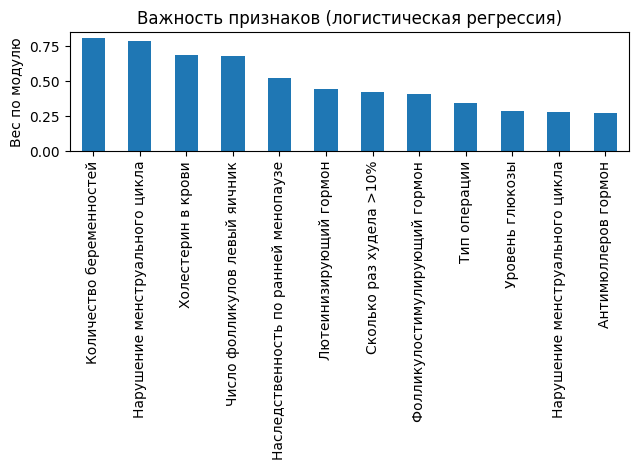

In [41]:
importances = []
for column in logreg_weights.columns:
    importances.append(mean(logreg_weights[column]))

importances = np.asarray(importances)

feature_scores = pd.Series(np.abs(importances), index=logreg_weights.columns).sort_values(ascending=False)

feature_scores = feature_scores.rename(rename_columns)

fig, ax = plt.subplots()
feature_scores[0:12].plot.bar(ax=ax)
ax.set_title("Важность признаков (логистическая регрессия)")
ax.set_ylabel("Вес по модулю")
fig.tight_layout()

## Случайный лес

/tmp/ipykernel_19978/3654162140.py:15: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  fig.tight_layout()


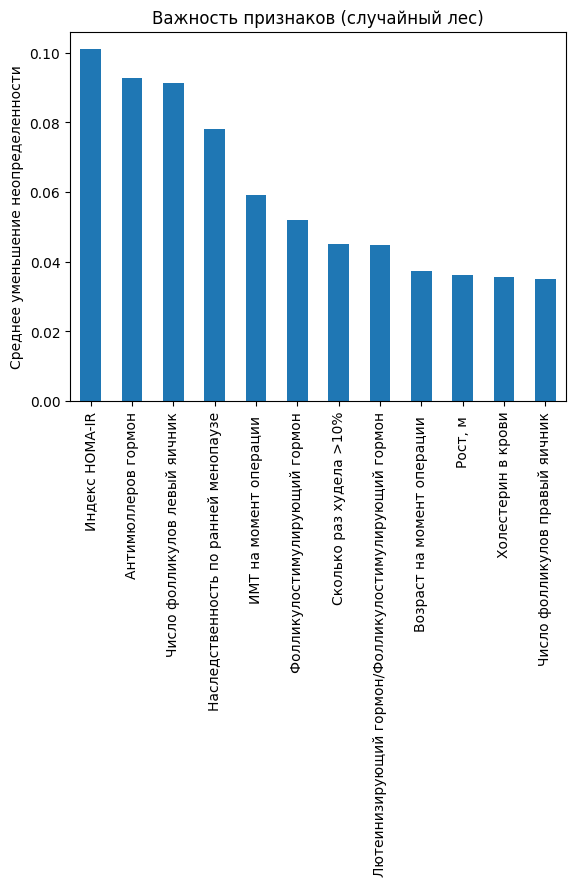

In [42]:
feature_names = X.columns

importances = []
for column in rt_weights.columns:
    importances.append(mean(rt_weights[column]))

feature_scores = pd.Series(importances, index=rt_weights.columns).sort_values(ascending=False)

feature_scores = feature_scores.rename(rename_columns)

fig, ax = plt.subplots()
feature_scores[:12].plot.bar(ax=ax)
ax.set_title("Важность признаков (cлучайный лес)")
ax.set_ylabel("Среднее уменьшение неопределенности")
fig.tight_layout()
plt.savefig('/home/user/study/bariatricSurgeryML/appendices/feature_scores/amg/random_forest.jpg', dpi=400)

## Экстремальный градиентный бустинг

/tmp/ipykernel_19978/696549133.py:15: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  fig.tight_layout()


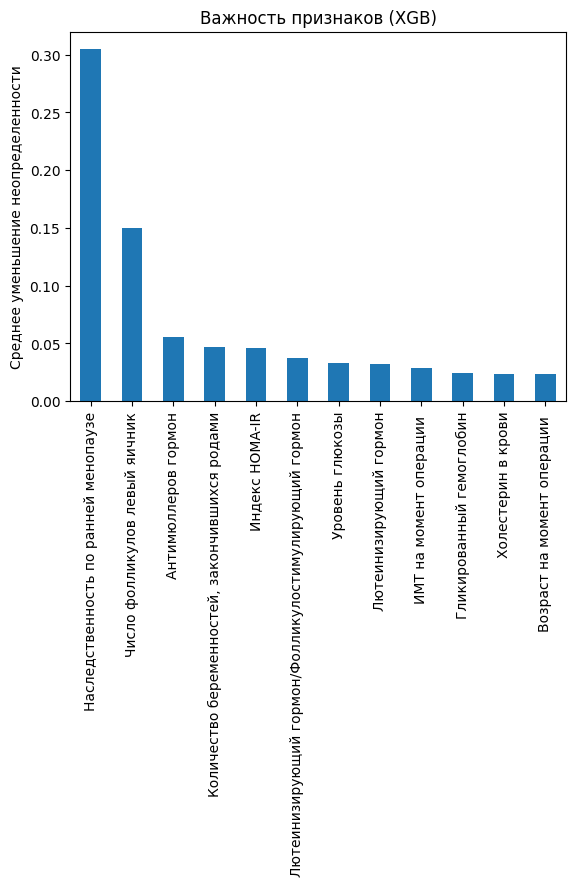

In [43]:
feature_names = X.columns

importances = []
for column in xgb_weights.columns:
    importances.append(mean(xgb_weights[column]))

feature_scores = pd.Series(importances, index=xgb_weights.columns).sort_values(ascending=False)

feature_scores = feature_scores.rename(rename_columns)

fig, ax = plt.subplots()
feature_scores[:12].plot.bar(ax=ax)
ax.set_title("Важность признаков (XGB)")
ax.set_ylabel("Среднее уменьшение неопределенности")
fig.tight_layout()

# Метод главных компонент

In [44]:
from sklearn import decomposition
import matplotlib.pyplot as plt

Text(0.5, 1.0, 'PCA')

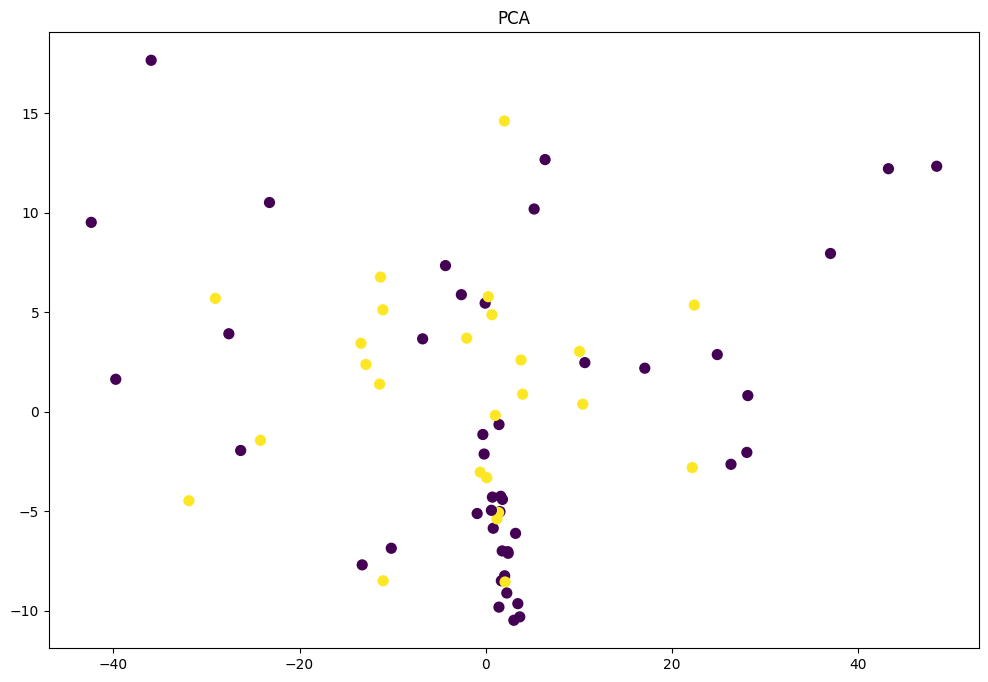

In [45]:
# Visualizing using PCA
pca = decomposition.PCA(n_components=4)
res = pca.fit_transform(X)
plt.figure(figsize=(12,8))
plt.scatter(res[:,0], res[:,1], c=y.values, s=50, cmap='viridis')
plt.title('PCA')